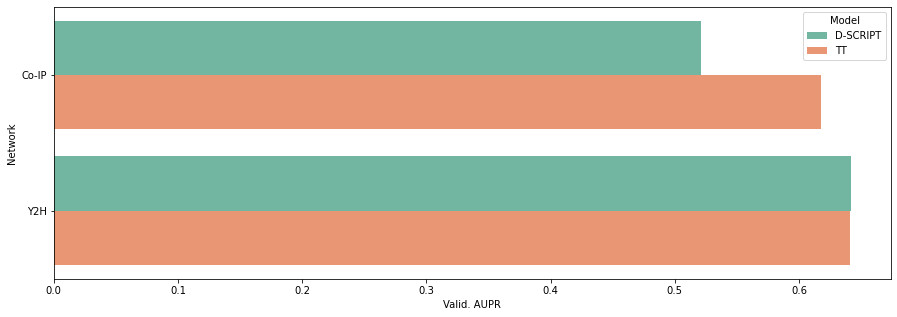

In [21]:
tmod = ["D-SCRIPT", "TT"]
tnet = ["Co-IP", "Y2H"]
data = [0.5211, 0.6174, 0.6417, 0.6408]
tdf = []
for i, n in enumerate(tnet):
    for j, m in enumerate(tmod):
        tdf.append((n, m, data[i * 2 + j]))
tdf = pd.DataFrame(tdf, columns = ["Network", "Model", "Valid. AUPR"])

f, ax = plt.subplots(figsize = (15, 5))
ax = sns.barplot(y = "Network", 
            x = "Valid. AUPR",
            hue = "Model", 
            orient = "h",
            palette="Set2",
           data = tdf)
f.savefig("training_dscript_tt.svg")

In [4]:
!for f in ../data/networks/dscript-tt/models/*; do echo $f; echo "--------------------"; cat $f/results.log | grep "Finished"; done
best_model = {"coip-dscript": "07",
              "coip-tt": "10",
              "y2h-dscript": "07",
              "y2h-tt": "10"
             }

#0.5211, 0.6174, 0.6154, 0.6408

../data/networks/dscript-tt/models/coip-dscript
--------------------
[2022-09-17-15:19:57] Finished Epoch 1/10: Loss=0.418366, Accuracy=88.865%, MSE=0.090531, Precision=0.372208, Recall=0.355875, F1=0.363858, AUPR=0.372372
[2022-09-17-18:24:40] Finished Epoch 2/10: Loss=0.239359, Accuracy=91.687%, MSE=0.0657484, Precision=0.38056, Recall=0.409259, F1=0.394388, AUPR=0.481008
[2022-09-17-21:27:24] Finished Epoch 3/10: Loss=0.221773, Accuracy=92.310%, MSE=0.0602921, Precision=0.402247, Recall=0.417609, F1=0.409784, AUPR=0.512091
[2022-09-18-00:30:02] Finished Epoch 4/10: Loss=0.261439, Accuracy=91.455%, MSE=0.0718422, Precision=0.341128, Recall=0.299617, F1=0.319028, AUPR=0.383529
[2022-09-18-03:34:30] Finished Epoch 5/10: Loss=0.239312, Accuracy=92.305%, MSE=0.0635275, Precision=0.438688, Recall=0.322995, F1=0.372055, AUPR=0.483903
[2022-09-18-06:36:58] Finished Epoch 6/10: Loss=0.327515, Accuracy=88.769%, MSE=0.0927826, Precision=0.270979, Recall=0.260529, F1=0.265651, AUPR=0.265514
[20

# D-SCRIPT model trained on Y2H network

In [2]:
!gpustat

imp                      Sun Sep 25 18:48:28 2022  470.141.03
[0] Tesla V100-PCIE-32GB | 32'C,   0 % |     0 / 32510 MB |
[1] Tesla V100-PCIE-32GB | 30'C,   0 % |     0 / 32510 MB |
[2] Tesla V100-PCIE-32GB | 32'C,   0 % |     0 / 32510 MB |
[3] Tesla V100-PCIE-32GB | 32'C,   0 % |     0 / 32510 MB |
[4] Tesla V100-PCIE-32GB | 31'C,   0 % |     0 / 32510 MB |
[5] Tesla V100-PCIE-32GB | 32'C,   0 % |     0 / 32510 MB |
[6] Tesla V100-PCIE-32GB | 31'C,   0 % |     0 / 32510 MB |
[7] Tesla V100-PCIE-32GB | 31'C,   2 % |     0 / 32510 MB |


In [10]:
MODELF="../data/networks/dscript-tt/models"
MODELS={k:f"{MODELF}/{k}/ep__epoch{v}.sav" for k, v in best_model.items()}
print(MODELS)
NETF="../data/networks/fly/"
FLYNET = {"coip": f"{NETF}fly_coip_evaluation.tsv",
         "y2h": f"{NETF}fly_y2hi_evaluation.tsv"}

for mod in MODELS.keys():
    for net in FLYNET.keys():
        !mkdir -p {NETF}/{mod}/{net}

{'coip-dscript': '../data/networks/dscript-tt/models/coip-dscript/ep__epoch07.sav', 'coip-tt': '../data/networks/dscript-tt/models/coip-tt/ep__epoch10.sav', 'y2h-dscript': '../data/networks/dscript-tt/models/y2h-dscript/ep__epoch07.sav', 'y2h-tt': '../data/networks/dscript-tt/models/y2h-tt/ep__epoch10.sav'}


In [21]:
from IPython.lib import backgroundjobs as bg

args   = []
for mod, modloc in MODELS.items():
    for net, netloc in FLYNET.items():
#        !dscript evaluate --model {modloc} --test {netloc} --device {device} -o {NETF}/{mod}/{net}/results 
        args.append((modloc, netloc, f"{NETF}/uprotfly-final.h5", 0, f"{NETF}/{mod}/{net}/results"))

In [22]:
args

[('../data/networks/dscript-tt/models/coip-dscript/ep__epoch07.sav',
  '../data/networks/fly/fly_coip_evaluation.tsv',
  '../data/networks/fly//uprotfly-final.h5',
  0,
  '../data/networks/fly//coip-dscript/coip/results'),
 ('../data/networks/dscript-tt/models/coip-dscript/ep__epoch07.sav',
  '../data/networks/fly/fly_y2hi_evaluation.tsv',
  '../data/networks/fly//uprotfly-final.h5',
  0,
  '../data/networks/fly//coip-dscript/y2h/results'),
 ('../data/networks/dscript-tt/models/coip-tt/ep__epoch10.sav',
  '../data/networks/fly/fly_coip_evaluation.tsv',
  '../data/networks/fly//uprotfly-final.h5',
  0,
  '../data/networks/fly//coip-tt/coip/results'),
 ('../data/networks/dscript-tt/models/coip-tt/ep__epoch10.sav',
  '../data/networks/fly/fly_y2hi_evaluation.tsv',
  '../data/networks/fly//uprotfly-final.h5',
  0,
  '../data/networks/fly//coip-tt/y2h/results'),
 ('../data/networks/dscript-tt/models/y2h-dscript/ep__epoch07.sav',
  '../data/networks/fly/fly_coip_evaluation.tsv',
  '../data/n

## Model: COIP-DSCRIPT, Test: COIP FLY

In [23]:
T1 = args[0]
!dscript evaluate --model {T1[0]} --test {T1[1]} --embedding {T1[2]} --device 1 -o {T1[4]}

[2022-09-25-19:19:01] Using CUDA device 1 - Tesla V100-PCIE-32GB
Predicting pairs: 100%|███████████████████| 48092/48092 [10:27<00:00, 76.68it/s]
[2022-09-25-19:30:01] AUPR: 0.12635056332063507
[2022-09-25-19:30:01] AUROC: 0.5386418259672925


## Model: COIP-DSCRIPT, Test: Y2H FLY

In [24]:
T1 = args[1]
!dscript evaluate --model {T1[0]} --test {T1[1]} --embedding {T1[2]} --device 1 -o {T1[4]}

[2022-09-25-19:30:18] Using CUDA device 1 - Tesla V100-PCIE-32GB
Predicting pairs: 100%|██████████████████| 48081/48081 [06:45<00:00, 118.63it/s]
[2022-09-25-19:37:27] AUPR: 0.14636877406495502
[2022-09-25-19:37:27] AUROC: 0.6080303403586407


## Model: COIP-TT, Test: COIP FLY

In [25]:
T1 = args[2]
!dscript evaluate --model {T1[0]} --test {T1[1]} --embedding {T1[2]} --device 1 -o {T1[4]}

[2022-09-25-19:37:43] Using CUDA device 1 - Tesla V100-PCIE-32GB
Predicting pairs: 100%|███████████████████| 48092/48092 [10:24<00:00, 76.96it/s]
[2022-09-25-19:48:33] AUPR: 0.1539604669821413
[2022-09-25-19:48:34] AUROC: 0.5779567915973647


## Model: COIP-TT, Test: Y2H FLY

In [26]:
T1 = args[3]
!dscript evaluate --model {T1[0]} --test {T1[1]} --embedding {T1[2]} --device 1 -o {T1[4]}

[2022-09-25-19:48:50] Using CUDA device 1 - Tesla V100-PCIE-32GB
Predicting pairs: 100%|██████████████████| 48081/48081 [06:44<00:00, 118.84it/s]
[2022-09-25-19:55:58] AUPR: 0.18696707878771116
[2022-09-25-19:55:58] AUROC: 0.6160223805105518


## Model: Y2H-DSCRIPT, Test: COIP FLY

In [28]:
T1 = args[4]
!dscript evaluate --model {T1[0]} --test {T1[1]} --embedding {T1[2]} --device 1 -o {T1[4]}

[2022-09-25-21:15:40] Using CUDA device 1 - Tesla V100-PCIE-32GB
Predicting pairs: 100%|███████████████████| 48092/48092 [10:23<00:00, 77.09it/s]
[2022-09-25-21:26:30] AUPR: 0.1275855399201909
[2022-09-25-21:26:30] AUROC: 0.53331343819398


## Model: Y2H-DSCRIPT, Test: Y2H FLY

In [29]:
T1 = args[5]
!dscript evaluate --model {T1[0]} --test {T1[1]} --embedding {T1[2]} --device 1 -o {T1[4]}

[2022-09-25-21:26:48] Using CUDA device 1 - Tesla V100-PCIE-32GB
Predicting pairs: 100%|██████████████████| 48081/48081 [06:45<00:00, 118.70it/s]
[2022-09-25-21:33:56] AUPR: 0.24778334707758126
[2022-09-25-21:33:57] AUROC: 0.668129258264614


## Model: Y2H-TT, Test: COIP FLY

In [30]:
T1 = args[6]
!dscript evaluate --model {T1[0]} --test {T1[1]} --embedding {T1[2]} --device 1 -o {T1[4]}

[2022-09-25-21:34:12] Using CUDA device 1 - Tesla V100-PCIE-32GB
Predicting pairs: 100%|███████████████████| 48092/48092 [10:26<00:00, 76.78it/s]
[2022-09-25-21:45:04] AUPR: 0.11862793093574077
[2022-09-25-21:45:04] AUROC: 0.5121332657123556


## Model: Y2H-TT, Test: Y2H FLY

In [31]:
T1 = args[7]
!dscript evaluate --model {T1[0]} --test {T1[1]} --embedding {T1[2]} --device 1 -o {T1[4]}

[2022-09-25-21:45:21] Using CUDA device 1 - Tesla V100-PCIE-32GB
Predicting pairs: 100%|██████████████████| 48081/48081 [06:46<00:00, 118.24it/s]
[2022-09-25-21:52:30] AUPR: 0.23923016135955955
[2022-09-25-21:52:31] AUROC: 0.6929701364115446


## TT

|     | coip | y2h (fly)|
|-----|------|----------|
|coip | 0.15 | 0.19     | 
|y2h  | 0.12 | 0.24     |

## D-SCRIPT

|     | coip | y2h (fly) |
|-----|------|-----------|
|coip | 0.13 | 0.15      |
|y2h  | 0.13 | 0.25      |

In [22]:
AUPR = [0.12635056332063507, 0.14636877406495502, 0.1539604669821413, 0.18696707878771116, 0.1275855399201909, 0.24778334707758126, 0.11862793093574077, 0.23923016135955955]
AUROC =  [0.5386418259672925, 0.6080303403586407, 0.5779567915973647, 0.6160223805105518, 0.53331343819398, 0.668129258264614, 0.5121332657123556, 0.6929701364115446]

          
models = ["Co-IP, D-SCRIPT", "Co-IP, TT", "Y2H, D-SCRIPT", "Y2H, TT"]
nets = ["Fly Co-IP", "Fly Y2H"]
scores = []

for i, model in enumerate(models):
    for j, net in enumerate(nets):
        scores.append((model, net, "AUPR", AUPR[i * 2 + j]))
        scores.append((model, net, "AUROC", AUROC[i * 2 + j]))

In [57]:
import pandas as pd

prdf = pd.DataFrame(scores)
prdf

,0,1,2,3
0,"Co-IP, D-SCRIPT",Fly Co-IP,AUPR,0.126351
1,"Co-IP, D-SCRIPT",Fly Co-IP,AUROC,0.538642
2,"Co-IP, D-SCRIPT",Fly Y2H,AUPR,0.146369
3,"Co-IP, D-SCRIPT",Fly Y2H,AUROC,0.608030
4,"Co-IP, TT",Fly Co-IP,AUPR,0.153960
5,"Co-IP, TT",Fly Co-IP,AUROC,0.577957
6,"Co-IP, TT",Fly Y2H,AUPR,0.186967
7,"Co-IP, TT",Fly Y2H,AUROC,0.616022
8,"Y2H, D-SCRIPT",Fly Co-IP,AUPR,0.127586
9,"Y2H, D-SCRIPT",Fly Co-IP,AUROC,0.533313


       0          1         3
0  Co-IP  Fly Co-IP  0.126351
1  Co-IP    Fly Y2H  0.146369
2    Y2H  Fly Co-IP  0.127586
3    Y2H    Fly Y2H  0.247783
       0          1         3
0  Co-IP  Fly Co-IP  0.153960
1  Co-IP    Fly Y2H  0.186967
2    Y2H  Fly Co-IP  0.118628
3    Y2H    Fly Y2H  0.239230


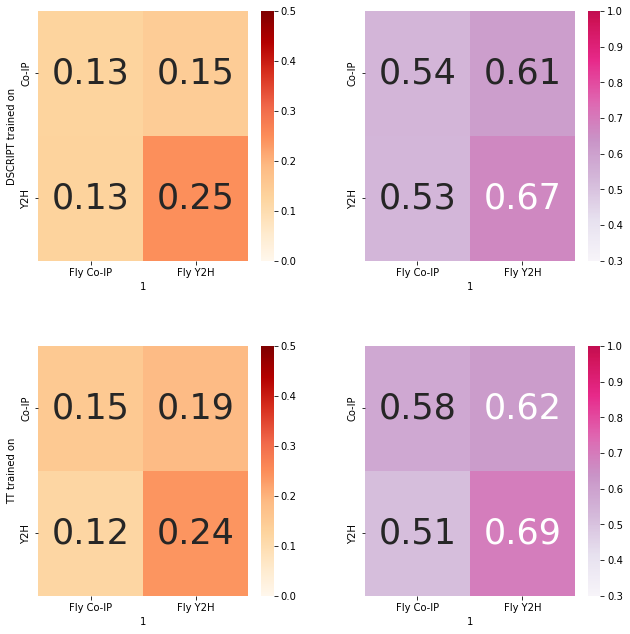

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 2, figsize = (10, 10))
df1 = prdf[prdf[0].str.endswith("D-SCRIPT") & (prdf[2] == "AUPR")].reset_index(drop = True)
df1.update(df1[0].apply(lambda x: x.split(",")[0]))
df1 = df1.drop(2, axis = 1)
print(df1)

sns.heatmap(df1.pivot(0, 1, 3), vmin= 0, vmax = 0.5, center = 0.25, cmap="OrRd", annot = True, annot_kws={"fontsize": 35}, ax = ax[0, 0])
ax[0, 0].set_ylabel("DSCRIPT trained on")

df2 = prdf[prdf[0].str.endswith("D-SCRIPT") & (prdf[2] == "AUROC")].reset_index(drop = True)
df2.update(df2[0].apply(lambda x: x.split(",")[0]))
df2 = df2.drop(2, axis = 1)

sns.heatmap(df2.pivot(0, 1, 3), vmin= 0.3, vmax = 1, center = 0.75, cmap="PuRd", annot = True, annot_kws={"fontsize": 35}, ax = ax[0, 1])
ax[0, 1].set_ylabel("")

df3 = prdf[prdf[0].str.endswith("TT") & (prdf[2] == "AUPR")].reset_index(drop = True)
df3.update(df3[0].apply(lambda x: x.split(",")[0]))
df3 = df3.drop(2, axis = 1)
print(df3)

sns.heatmap(df3.pivot(0, 1, 3), vmin= 0, vmax = 0.5, center = 0.25, cmap="OrRd", annot = True, annot_kws={"fontsize": 35}, ax = ax[1, 0])
ax[1, 0].set_ylabel("TT trained on")

df4 = prdf[prdf[0].str.endswith("TT") & (prdf[2] == "AUROC")].reset_index(drop = True)
df4.update(df4[0].apply(lambda x: x.split(",")[0]))
df4 = df4.drop(2, axis = 1)

sns.heatmap(df4.pivot(0, 1, 3), vmin= 0.3, vmax = 1, center = 0.75, cmap="PuRd", annot = True, annot_kws={"fontsize": 35}, ax = ax[1, 1])
ax[1, 1].set_ylabel("")

f.tight_layout(pad=5)
f.savefig("dscript_tt.svg")

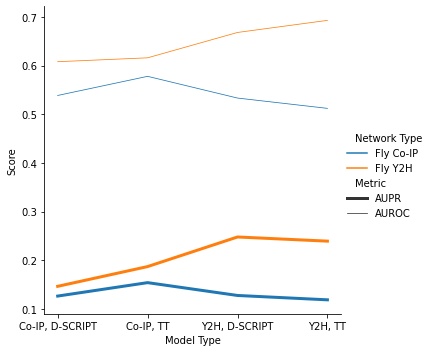

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

prdf.columns = ["Model Type", "Network Type", "Metric", "Score"]

sns.relplot(data = prdf,
            x = "Model Type",
            y = "Score",
            hue = "Network Type",
            size = "Metric",
            size_order = ["AUPR", "AUROC"],
            kind = "line")
plt.savefig("dscript_fly.svg")